In [1]:
import sys
print(sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print ("Scikit-Learn version: ", sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)
Scikit-Learn version:  1.3.0


In [2]:
from pathlib import Path

path = Path() / "npz" / "asdf"
print(path)

npz\asdf


In [3]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    # Show axis for now
    # plt.axis("off")
    plt.plot()

In [4]:
all_num_test = np.load(path / "digit_data_10_Test_1.npz")
all_num_trVal = np.load(path / "digit_data_TrVal_1.npz")
all_sym_test = np.load(path / "op_data_10_Test_1.npz")
all_sym_trVal = np.load(path / "op_data_TrVal_1.npz")

In [5]:
# sample = all_num_trVal["img"][4]
# plot_digit(sample)
# plt.show()
num_trVal_labeled, num_cnt = np.unique(all_num_trVal["label"], return_counts=True)

for i in range(len(num_trVal_labeled)):
    print(f"{num_trVal_labeled[i]} 개수: {num_cnt[i]}")

+ 개수: 120
- 개수: 122
/ 개수: 121
0 개수: 1465
1 개수: 1462
2 개수: 1399
3 개수: 1448
4 개수: 1438
5 개수: 1441
6 개수: 1478
7 개수: 1461
8 개수: 1469
9 개수: 1437
= 개수: 124
x 개수: 134


In [6]:
sym, sym_cnt = np.unique(all_sym_trVal["label"],return_counts=True)

for i in range(len(sym)):
    print(f"{sym[i]} 개수: {sym_cnt[i]}")

% 개수: 162
* 개수: 599
+ 개수: 2961
- 개수: 2979
/ 개수: 2794
0 개수: 29
1 개수: 28
10 개수: 58
11 개수: 55
12 개수: 63
13 개수: 47
14 개수: 61
2 개수: 23
3 개수: 27
4 개수: 27
5 개수: 26
6 개수: 29
7 개수: 24
8 개수: 31
9 개수: 33
= 개수: 2917
X 개수: 113
x 개수: 2243


so we can see in the num there is +,-,/,=,x(sym) labels,
and in the sym there is 0-9, and numerous misleading labels(10-14,%,*)

the plan is:
1. replace(concentrate the 0-9 in sym and symbolic in num
2. define each labels into appropriate labels
- we can assume % is /, * is x, X is x, etc., so it should not be hard(i guess?)

## 1. replace

In [7]:
# num test

num_test_img = all_num_test["img"]
num_test_label = all_num_test["label"]

num_test_img_error = num_test_img[np.where((num_test_label == '+') | (num_test_label == '-') | (num_test_label == 'x') | (num_test_label == '/') | (num_test_label == '='))]
num_test_img_real = num_test_img[np.where((num_test_label != '+') & (num_test_label != '-') & (num_test_label != 'x') & (num_test_label != '/') & (num_test_label != '='))]

num_test_label_error = num_test_label[np.where((num_test_label == '+') | (num_test_label == '-') | (num_test_label == 'x') | (num_test_label == '/') | (num_test_label == '='))]
num_test_label_real = num_test_label[np.where((num_test_label != '+') & (num_test_label != '-') & (num_test_label != 'x') & (num_test_label != '/') & (num_test_label != '='))]

In [8]:
print(np.unique(num_test_label_real))
print(np.unique(num_test_label_error))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
['+' '-' '/' '=' 'x']


do this to all datasets(which is quite confusing)

In [9]:
# num trVal

num_trVal_img = all_num_trVal["img"]
num_trVal_label = all_num_trVal["label"]

num_trVal_img_error = num_trVal_img[np.where((num_trVal_label == '+') | (num_trVal_label == '-') | (num_trVal_label == 'x') | (num_trVal_label == '/') | (num_trVal_label == '='))]
num_trVal_img_real = num_trVal_img[np.where((num_trVal_label != '+') & (num_trVal_label != '-') & (num_trVal_label != 'x') & (num_trVal_label != '/') & (num_trVal_label != '='))]

num_trVal_label_error = num_trVal_label[np.where((num_trVal_label == '+') | (num_trVal_label == '-') | (num_trVal_label == 'x') | (num_trVal_label == '/') | (num_trVal_label == '='))]
num_trVal_label_real = num_trVal_label[np.where((num_trVal_label != '+') & (num_trVal_label != '-') & (num_trVal_label != 'x') & (num_trVal_label != '/') & (num_trVal_label != '='))]

In [10]:
print(np.unique(num_trVal_label_real))
print(np.unique(num_trVal_label_error))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
['+' '-' '/' '=' 'x']


## 2. define to appropriate labels

before splitting, we should check the wrong labels and fix it

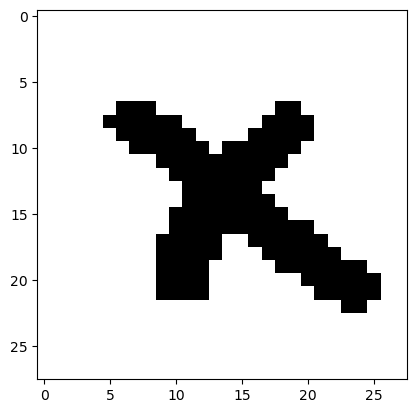

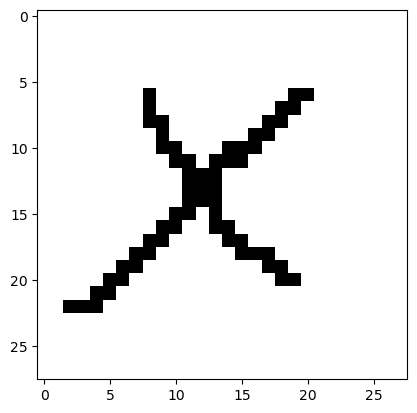

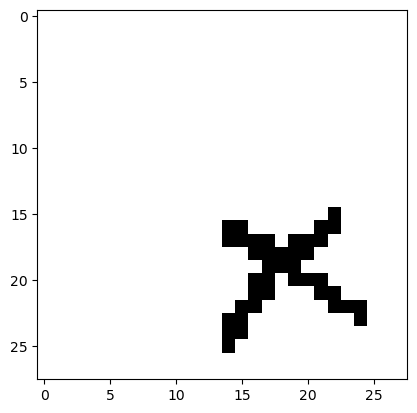

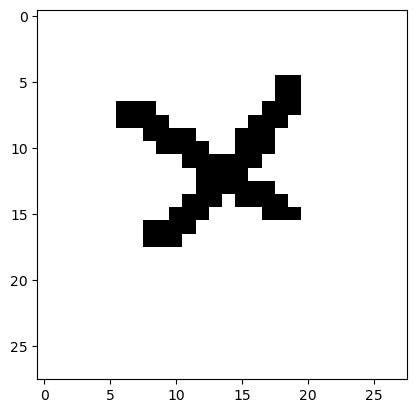

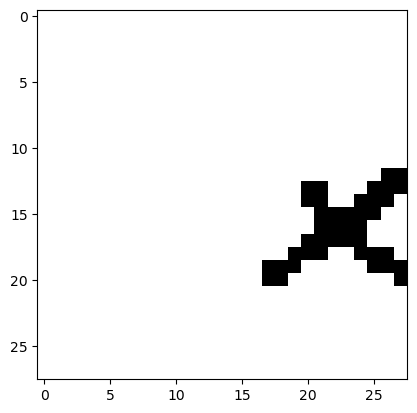

In [11]:
# symbols test

sym_test_img = all_sym_test["img"]
sym_test_label = all_sym_test["label"]

# * check
sym_test_wrong_x1 = sym_test_img[np.where((sym_test_label == '*'))]
for i in range(5):
    plot_digit(sym_test_wrong_x1[i])
    plt.show()

so '*' is 'x', re-define into 'x'

In [12]:
sym_test_label[np.where((sym_test_label == '*'))] = 'x'

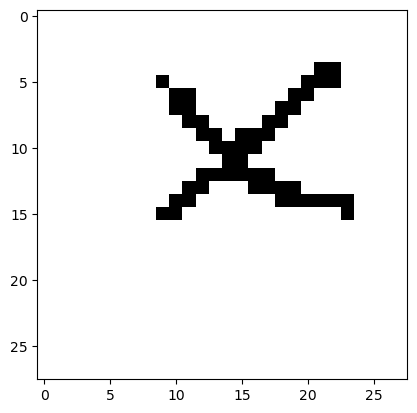

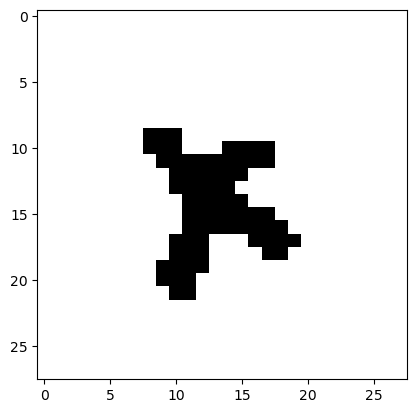

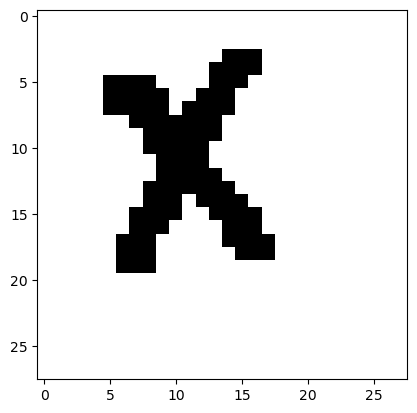

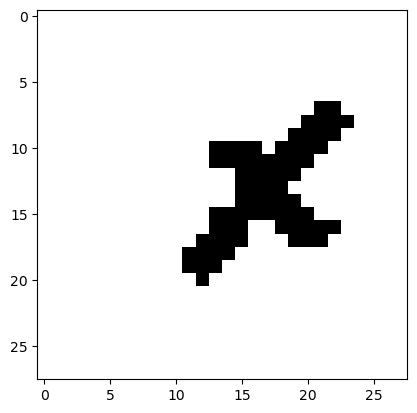

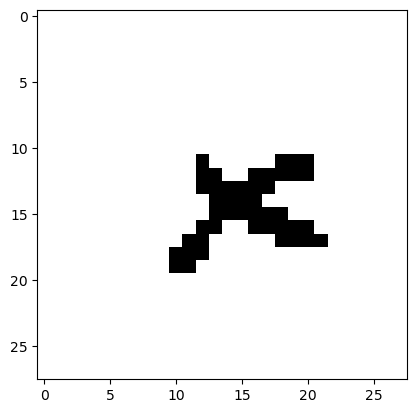

In [13]:
# X check
sym_test_wrong_x2 = sym_test_img[np.where((sym_test_label == 'X'))]
for i in range(5):
    plot_digit(sym_test_wrong_x2[i])
    plt.show()

In [14]:
sym_test_label[np.where((sym_test_label == 'X'))] = 'x'

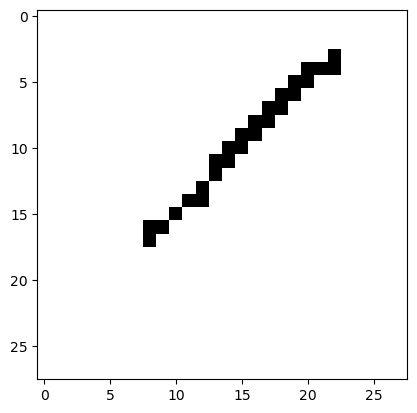

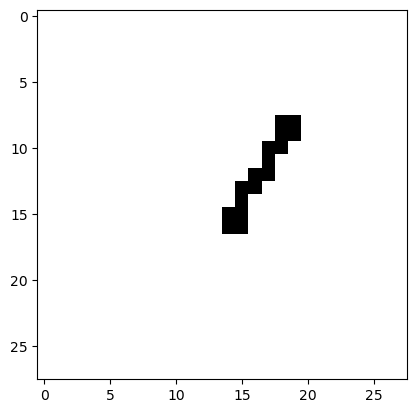

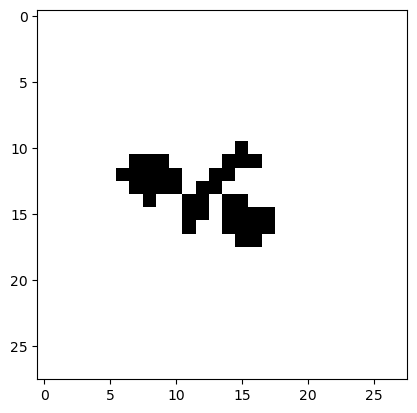

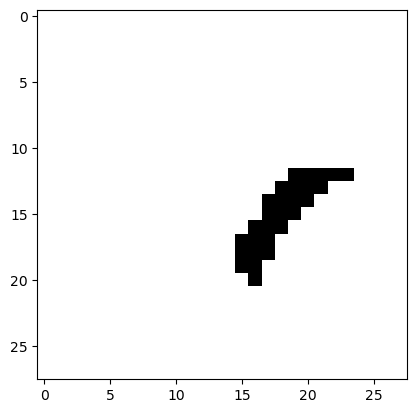

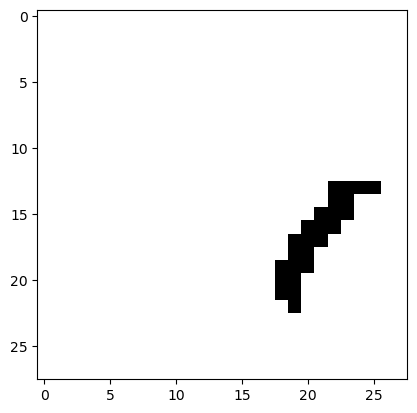

In [15]:
# % check
sym_test_wrong_div = sym_test_img[np.where((sym_test_label == '%'))]
for i in range(5):
    plot_digit(sym_test_wrong_div[i])
    plt.show()

In [16]:
sym_test_label[np.where((sym_test_label == '%'))] = '/'

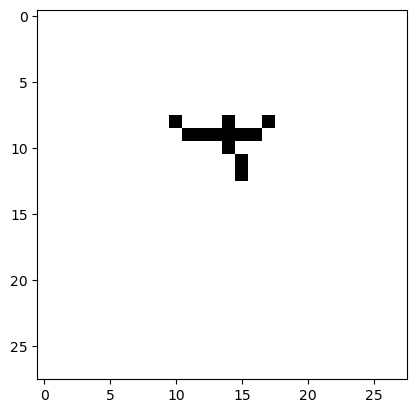

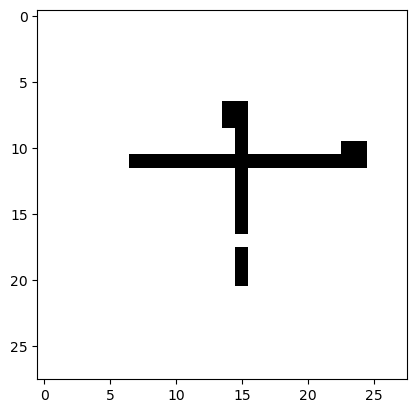

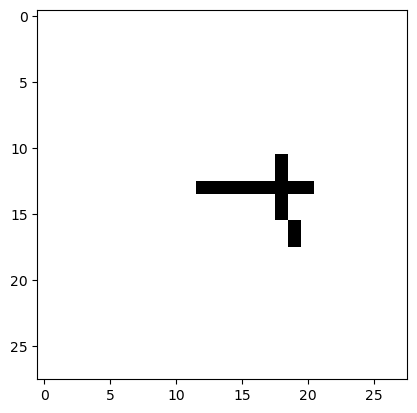

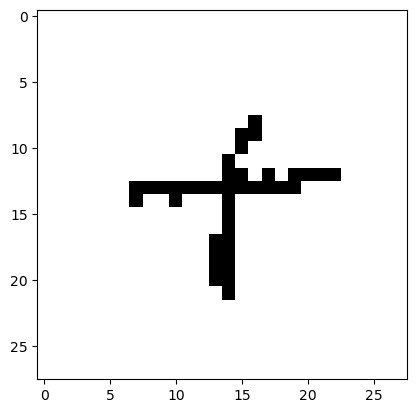

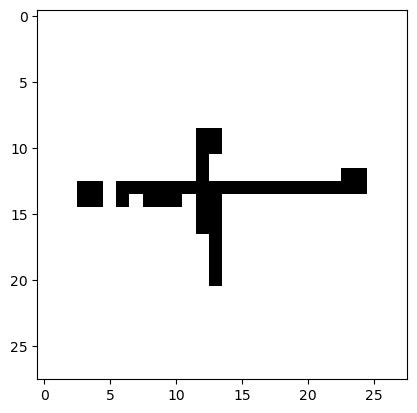

In [17]:
# check 10

sym_test_wrong_10 = sym_test_img[np.where((sym_test_label == '10'))]
for i in range(5):
    plot_digit(sym_test_wrong_10[i])
    plt.show()

In [18]:
sym_test_label[np.where((sym_test_label == '10'))] = '+'

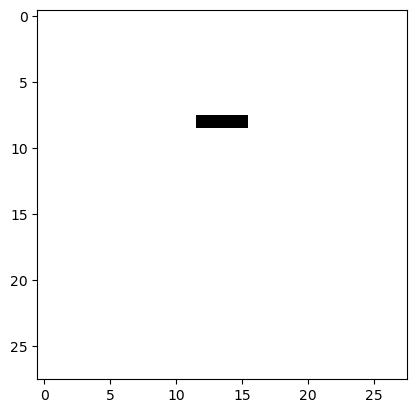

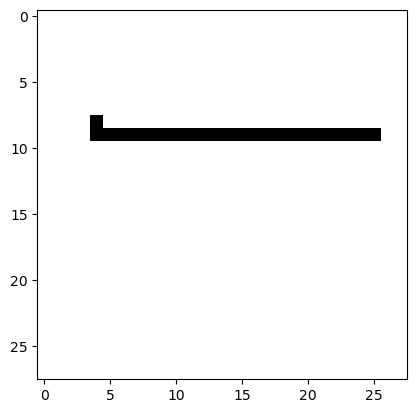

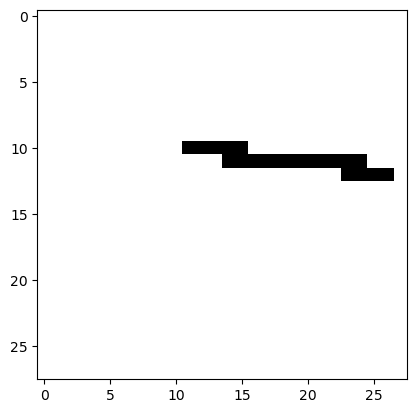

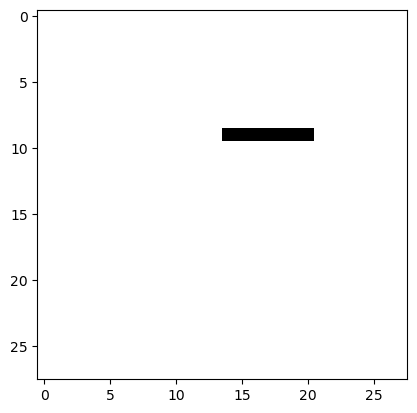

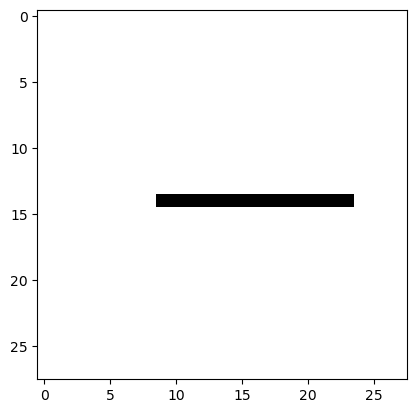

In [19]:
# check 11

sym_test_wrong_11 = sym_test_img[np.where((sym_test_label == '11'))]
for i in range(5):
    plot_digit(sym_test_wrong_11[i])
    plt.show()

In [20]:
sym_test_label[np.where((sym_test_label == '11'))] = '-'

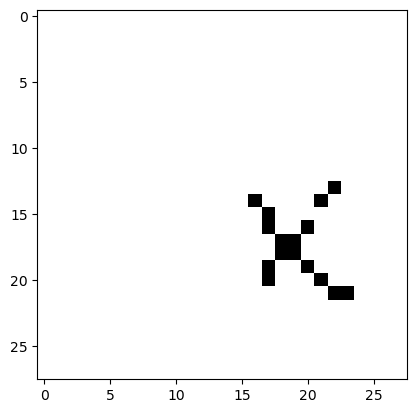

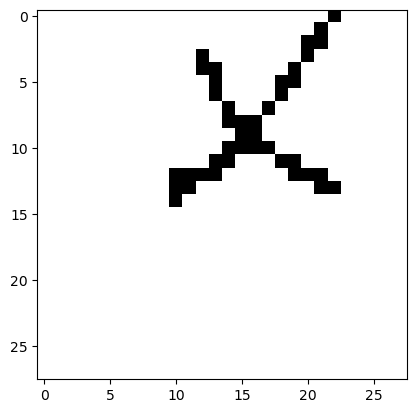

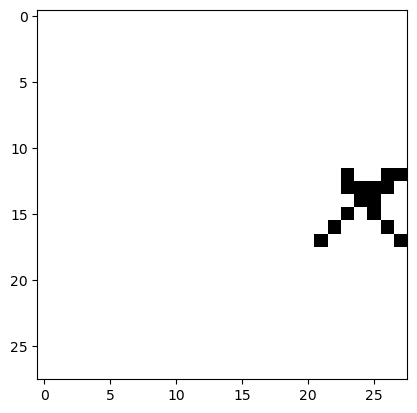

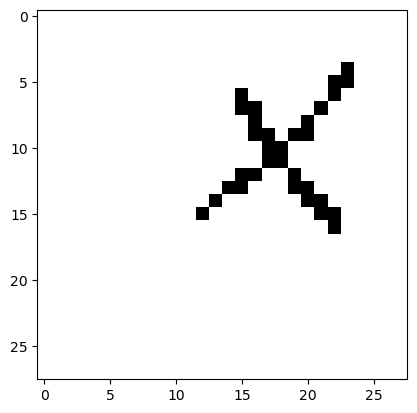

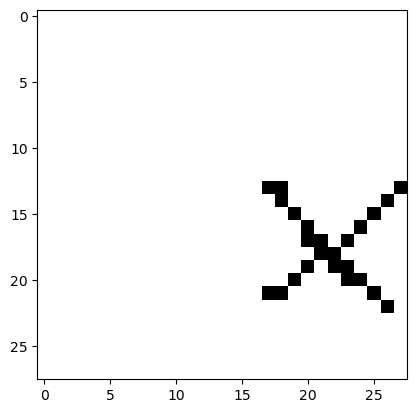

In [21]:
# check 12

sym_test_wrong_12 = sym_test_img[np.where((sym_test_label == '12'))]
for i in range(5):
    plot_digit(sym_test_wrong_12[i])
    plt.show()

In [22]:
sym_test_label[np.where((sym_test_label == '12'))] = 'x'

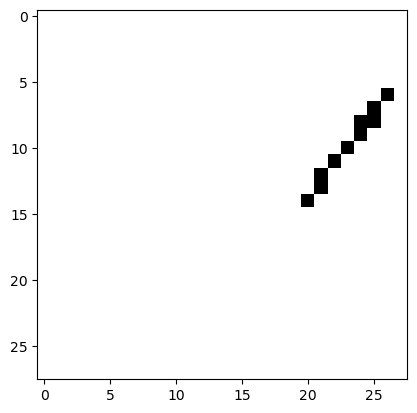

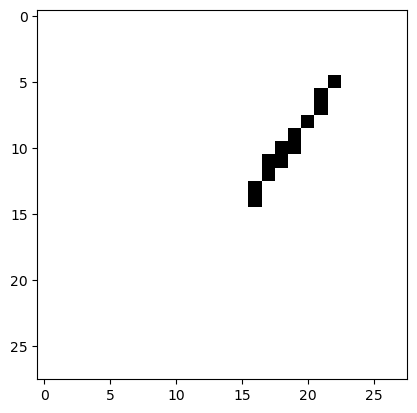

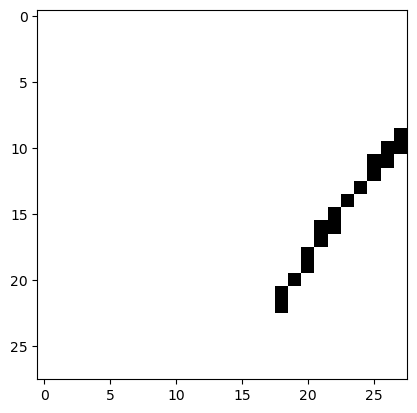

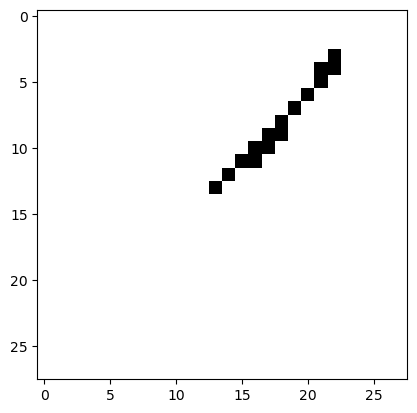

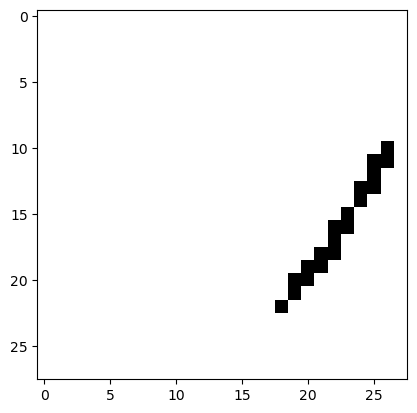

In [23]:
# check 13

sym_test_wrong_13 = sym_test_img[np.where((sym_test_label == '13'))]
for i in range(5):
    plot_digit(sym_test_wrong_13[i])
    plt.show()

In [24]:
sym_test_label[np.where((sym_test_label == '13'))] = '/'

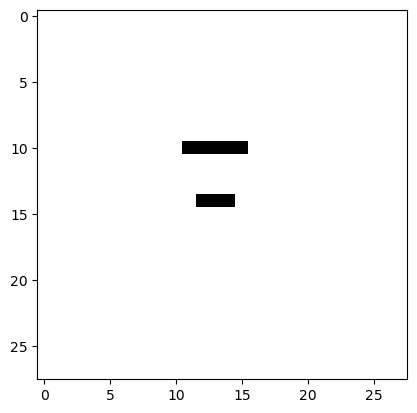

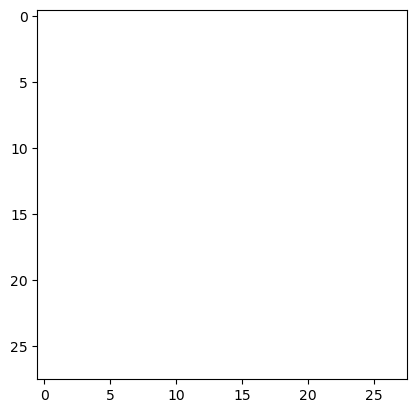

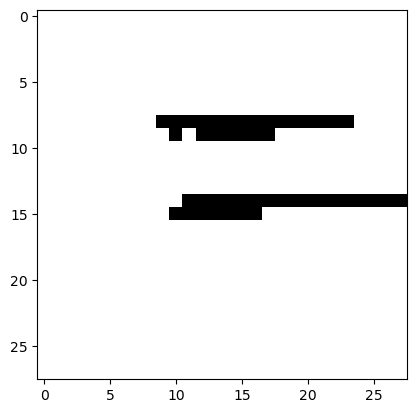

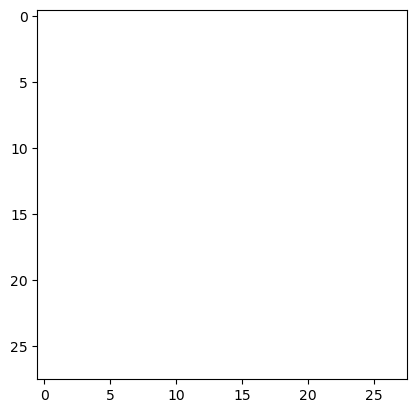

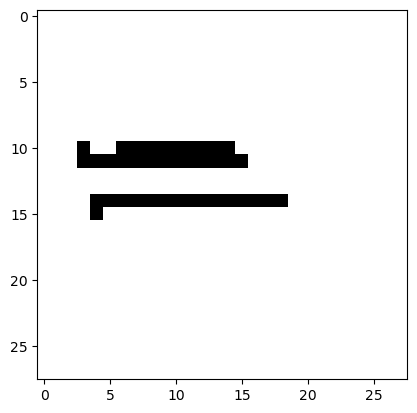

In [25]:
# check 14

sym_test_wrong_14 = sym_test_img[np.where((sym_test_label == '14'))]
for i in range(5):
    plot_digit(sym_test_wrong_14[i])
    plt.show()

In [26]:
sym_test_label[np.where((sym_test_label == '14'))] = '='

In [27]:
# check

print(np.unique(sym_test_label))

['+' '-' '/' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '=' 'x']


0-9 would be separated later on

now we know what label is what, so no checking for trVal

In [28]:
# trVal

sym_trVal_img = all_sym_trVal["img"]
sym_trVal_label = all_sym_trVal["label"]

# *
sym_trVal_label[np.where((sym_trVal_label == '*'))] = 'x'

# X
sym_trVal_label[np.where((sym_trVal_label == 'X'))] = 'x'

# %
sym_trVal_label[np.where((sym_trVal_label == '%'))] = '/'

# 10
sym_trVal_label[np.where((sym_trVal_label == '10'))] = '+'

# 11
sym_trVal_label[np.where((sym_trVal_label == '11'))] = '-'

# 12
sym_trVal_label[np.where((sym_trVal_label == '12'))] = 'x'

# 13
sym_trVal_label[np.where((sym_trVal_label == '13'))] = '/'

# 14
sym_trVal_label[np.where((sym_trVal_label == '14'))] = '='

In [29]:
# check

print(np.unique(sym_trVal_label))

['+' '-' '/' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '=' 'x']


In [30]:
# symbols test

# sym_test_img = all_sym_test["img"]
# sym_test_label = all_sym_test["label"]

sym_test_img_real = sym_test_img[np.where((sym_test_label == '+') | (sym_test_label == '-') | (sym_test_label == 'x') | (sym_test_label == '/') | (sym_test_label == '='))]
sym_test_img_error = sym_test_img[np.where((sym_test_label != '+') & (sym_test_label != '-') & (sym_test_label != 'x') & (sym_test_label != '/') & (sym_test_label != '='))]

sym_test_label_real = sym_test_label[np.where((sym_test_label == '+') | (sym_test_label == '-') | (sym_test_label == 'x') | (sym_test_label == '/') | (sym_test_label == '='))]
sym_test_label_error = sym_test_label[np.where((sym_test_label != '+') & (sym_test_label != '-') & (sym_test_label != 'x') & (sym_test_label != '/') & (sym_test_label != '='))]

In [31]:
print(np.unique(sym_test_label_real))
print(np.unique(sym_test_label_error))

['+' '-' '/' '=' 'x']
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [32]:
# sym trVal

# sym_trVal_img = all_sym_trVal["img"]
# sym_trVal_label = all_sym_trVal["label"]

sym_trVal_img_real = sym_trVal_img[np.where((sym_trVal_label == '+') | (sym_trVal_label == '-') | (sym_trVal_label == 'x') | (sym_trVal_label == '/') | (sym_trVal_label == '='))]
sym_trVal_img_error = sym_trVal_img[np.where((sym_trVal_label != '+') & (sym_trVal_label != '-') & (sym_trVal_label != 'x') & (sym_trVal_label != '/') & (sym_trVal_label != '='))]

sym_trVal_label_real = sym_trVal_label[np.where((sym_trVal_label == '+') | (sym_trVal_label == '-') | (sym_trVal_label == 'x') | (sym_trVal_label == '/') | (sym_trVal_label == '='))]
sym_trVal_label_error = sym_trVal_label[np.where((sym_trVal_label != '+') & (sym_trVal_label != '-') & (sym_trVal_label != 'x') & (sym_trVal_label != '/') & (sym_trVal_label != '='))]

In [33]:
print(np.unique(sym_trVal_label_real))
print(np.unique(sym_trVal_label_error))

['+' '-' '/' '=' 'x']
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


## merge

In [34]:
num_test_img_merged = np.concatenate((num_test_img_real, sym_test_img_error))
num_test_label_merged = np.concatenate((num_test_label_real, sym_test_label_error))

sym_test_img_merged = np.concatenate((sym_test_img_real, num_test_img_error))
sym_test_label_merged = np.concatenate((sym_test_label_real, num_test_label_error))

num_trVal_img_merged = np.concatenate((num_trVal_img_real, sym_trVal_img_error))
num_trVal_label_merged = np.concatenate((num_trVal_label_real, sym_trVal_label_error))

sym_trVal_img_merged = np.concatenate((sym_test_img_real, num_trVal_img_error))
sym_trVal_label_merged = np.concatenate((sym_test_label_real, num_trVal_label_error))

In [35]:
print(np.unique(num_test_label_merged), np.unique(num_trVal_label_merged))
print(np.unique(sym_test_label_merged), np.unique(sym_trVal_label_merged))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9'] ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
['+' '-' '/' '=' 'x'] ['+' '-' '/' '=' 'x']


In [37]:
print(num_test_img_merged.shape, num_test_label_merged.shape)
print(num_trVal_img_merged.shape, num_trVal_label_merged.shape)
print(sym_test_img_merged.shape, sym_test_label_merged.shape)
print(sym_trVal_img_merged.shape, sym_trVal_label_merged.shape)

(2112, 28, 28) (2112,)
(14775, 28, 28) (14775,)
(2238, 28, 28) (2238,)
(2764, 28, 28) (2764,)


## npz out

In [38]:
np.savez_compressed(path / 'digit_data_10_Test_corrected.npz', img=num_test_img_merged, label=num_test_label_merged)
np.savez_compressed(path / 'digit_data_TrVal_corrected.npz', img=num_trVal_img_merged, label=num_trVal_label_merged)
np.savez_compressed(path / 'op_data_10_Test_corrected', img=sym_test_img_merged, label=sym_test_label_merged)
np.savez_compressed(path / 'op_data_TrVal_corrected.npz', img=sym_trVal_img_merged, label=sym_trVal_label_merged)

all_num_test.close()
all_num_trVal.close()
all_sym_test.close()
all_sym_trVal.close()